In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv("../data/raw/train.csv")

### Dataset inspection

- Should we worry about computational complexity? (No, small dataset and small number of features)

- Should we use sampling techniques to reduce the size of the dataset? (No)

In [3]:
def display_df_memory_usage(df):
    """
    Display the memory usage of a dataframe.    
    """  
    md_table_str = '|Column Name|Size (MB)|\n|---|---|\n'
    mem_mb_total = 0
    for col_name, mem_bytes in df.memory_usage(deep=True).items():
        mem_mb = mem_bytes / 1024**2
        mem_mb_total += mem_mb
        md_table_str += '|{}|{:.2f}|\n'.format(col_name, mem_mb)
    md_table_str += '|Total|{:.2f}|\n'.format(mem_mb_total)
    display(Markdown(md_table_str))
display_df_memory_usage(df)

|Column Name|Size (MB)|
|---|---|
|Index|0.00|
|PassengerId|0.01|
|Survived|0.01|
|Pclass|0.01|
|Name|0.07|
|Sex|0.05|
|Age|0.01|
|SibSp|0.01|
|Parch|0.01|
|Ticket|0.05|
|Fare|0.01|
|Cabin|0.03|
|Embarked|0.05|
|Total|0.31|


### Conclusion:

- We're working with a small dataset. Thus we can use all the data without worrying about computational resources or sampling the data.

## Data Quality Checks

- Are there too many missing values? (Just in some columns)
- Any there any columns with many values missing? (Yes, cabin)
- Should we drop any columns? (Maybe, cabin)
- Are there  duplicate values? (No)
- Any there strange behavior or corelation in the data? (No, it's seems to be ok. But we should investigate with more sophisticated methods)
  - At first glance, we can think that the embarked port affect the survival rate. But the initial analysis showed that maybe it's not the case.
  - Survival rate it seems correlated with the Pclass
- Should we stop the analysis? (No, we should continue)
  

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# create a series with the percentage of missing values for each column
missing_values = df.isnull().sum() / len(df)*100
missing_values = missing_values.sort_values(ascending=False)
missing_values.rename("% missing values", inplace=True)
display(Markdown('**Missing values**'))
display(Markdown(missing_values.to_markdown()))

**Missing values**

|             |   % missing values |
|:------------|-------------------:|
| Cabin       |          77.1044   |
| Age         |          19.8653   |
| Embarked    |           0.224467 |
| PassengerId |           0        |
| Survived    |           0        |
| Pclass      |           0        |
| Name        |           0        |
| Sex         |           0        |
| SibSp       |           0        |
| Parch       |           0        |
| Ticket      |           0        |
| Fare        |           0        |

In [6]:
# print a markdown table with the col , the number of unique values and the unique values list

def unique_values_table(df):
    """Print a markdown table
    with the col, the number of unique values and the unique values 
    list if there are more than 4 unique values.
    """
    md_table_str = '|Column Name|Unique Values||\n|---|---|---|\n'
    for col_name, unique_values in df.nunique().items():
        if unique_values > 3:
            md_table_str += '|{}|{}|\n'.format(col_name, unique_values)
        else:
            md_unique_str = ' '.join([
                f'{name}: {value*100:.1f}\%'
                for name, value in 
                df[col_name].value_counts(normalize=True).items()
            ])

            md_table_str += '|{}|{}|{}\n'.format(
                col_name, unique_values, md_unique_str)
    display(Markdown(md_table_str))
unique_values_table(df)


|Column Name|Unique Values||
|---|---|---|
|PassengerId|891|
|Survived|2|0: 61.6\% 1: 38.4\%
|Pclass|3|3: 55.1\% 1: 24.2\% 2: 20.7\%
|Name|891|
|Sex|2|male: 64.8\% female: 35.2\%
|Age|88|
|SibSp|7|
|Parch|7|
|Ticket|681|
|Fare|248|
|Cabin|147|
|Embarked|3|S: 72.4\% C: 18.9\% Q: 8.7\%


In [7]:
# drop PassengerId column
df.drop(columns=['PassengerId'], inplace=True)

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# check for duplicate rows
display(Markdown('**Duplicate rows**'))
display(Markdown(f'{df.duplicated().sum()} duplicate rows'))

**Duplicate rows**

0 duplicate rows

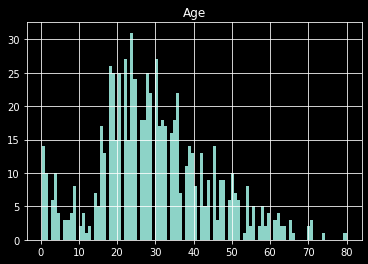

In [10]:
df.hist('Age', bins=100)
plt.show()

- The `Age` feature distribution seems to be skewed. We should take this into account if we will perform any kind of replacement of missing values. 

- The values are between 0 and 80 which seems to be a reasonable range.

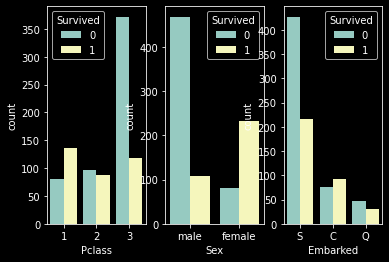

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=3)
for a, col in zip(axes, ['Pclass', 'Sex', 'Embarked']):
    sns.countplot(x=col ,hue='Survived',data=df, ax=a)
plt.show()

- The `Pclass` seems to affect the survival rate. Which seems reasonable.

-   The discrepancy between female/male rates can be related to the code of conduct
"*Women and children first*". Howerver, we must to investigate this better. Because this discrepancy can be caused by other factors.

-  At first glance it seems that the passenger that embarked in the `S` point are more likely to die. Obviously, is unrealistic that where the passenger chose to embark affect the chance of survival. 
   -  Almost $72\%$ of the passengers embarked in the S point.

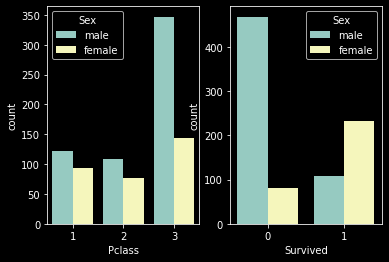

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for a, col in zip(axes, ['Pclass', 'Survived']):
    sns.countplot(x=col ,hue='Sex',data=df, ax=a)
plt.show()

- We can notice that the third class is composed mostly of male passengers. So perhaps the discrepancy in survival rates between male and female passengers could be related to this. We must investigate this with more carefully.

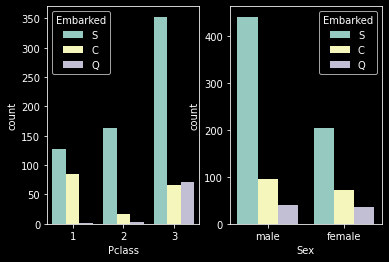

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for a, col in zip(axes, ['Pclass', 'Sex']):
    sns.countplot(x=col ,hue='Embarked',data=df, ax=a)
plt.show()

In [51]:
sce = df[
    ['Embarked', 'Pclass']].groupby(
        ['Embarked', 'Pclass']
    ).agg(
        {'Pclass': 'count'}
    )

sce['Percentage'] = sce.groupby(
        level=0
    ).apply(
        lambda x: 100 * x / float(x.sum())
    )
sce['Percentage'] = sce['Percentage'].map(
        lambda x: f'{x:.1f}%')
sce

Pclass Percentage
Embarked Pclass                   
C        1           85      50.6%
         2           17      10.1%
         3           66      39.3%
Q        1            2       2.6%
         2            3       3.9%
         3           72      93.5%
S        1          127      19.7%
         2          164      25.5%
         3          353      54.8%

- We can notice that mostly of the passengers that emabrked in the `S` point came from the third class. 
- The `Q` point also has a higher rate of third class of passengers. But there is a diffrence because contrary to the `S` point, the number of passengers that embarked in the `Q` point is much lower.